<a href="https://colab.research.google.com/github/nishantkumar1308/Cryptographic-Key-Generation/blob/main/Image_encryption_using_henon_and_arnold_cat_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is chaos?**


`Chaotic systems are a simple sub-type of nonlinear dynamical systems. They may contain very few interacting parts and these may follow very simple rules, but these systems all have a very sensitive dependence on their initial conditions. Despite their deterministic simplicity, over time these systems can produce totally unpredictable and wildly divergent (aka, chaotic) behavior.`

**Arnold Cat map.**

Arnold's cat map is a chaotic map often used for pixel manipulation. It applies a tranform on the image that essentially shuffles the pixels by stretching anf folding thethe image. When an optimal number of iterations of the transformation is applied on the image, the resulting image becomes incomprehensible and hence encrypted.

For this implementation The transform applied on the image is: R([x,y]) = [(x + y) mod n, (x + 2y) mod n] where n is the dimensions of the image



When the transformation is repeated enough times, the original image will reappear. The number of iterations 'n' at which the original image will reappear is given by these rules of thumb: Here 'd' is the dimension of the square image:

if d = 2.(5^i) for i >=1, n = 3*d
if d = (5^i) for i >=1, n = 2*d
if d = 6.(5^i) for i>=1, n = 2*d
else n <= 12*d / 7
This periodicity forms the crux of the encryption process. Here key is the number of iterations of transformations initially applied to get the encrypted image. n - key is the number of rounds of transformations applied to get the decrypted image.

In [69]:
from google.colab import files
uploaded = files.upload()
import cv2
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
import numpy as np
from math import log
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2 
import random
from math import log
from google.colab.patches import cv2_imshow
from tqdm import tqdm

Saving HorizonZero.png to HorizonZero.png


In [70]:
def getImageMatrix(imageName):
    im = Image.open(imageName) 
    pix = im.load()
    color = 1
    if type(pix[0,0]) == int:
      color = 0
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix,image_size[0],color

In [71]:
def getImageMatrix_gray(imageName):
    im = Image.open(imageName).convert('LA')
    pix = im.load()
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix,image_size[0]

In [72]:
def ArnoldCatTransform(img, num):
    rows, cols, ch = img.shape
    n = rows
    img_arnold = np.zeros([rows, cols, ch])
    for x in range(0, rows):
        for y in range(0, cols):
            img_arnold[x][y] = img[(x+y)%n][(x+2*y)%n]  
    return img_arnold

In [73]:
 def ArnoldCatEncryption(imageName, key):
    img = cv2.imread(imageName)
    for i in range (0,key):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite(imageName.split('.')[0] + "_ArnoldcatEnc.png", img)
    return img

In [74]:
def ArnoldCatDecryption(imageName, key):
    img = cv2.imread(imageName)
    rows, cols, ch = img.shape
    dimension = rows
    decrypt_it = dimension
    if (dimension%2==0) and 5**int(round(log(dimension/2,5))) == int(dimension/2):
        decrypt_it = 3*dimension
    elif 5**int(round(log(dimension,5))) == int(dimension):
        decrypt_it = 2*dimension
    elif (dimension%6==0) and  5**int(round(log(dimension/6,5))) == int(dimension/6):
        decrypt_it = 2*dimension
    else:
        decrypt_it = int(12*dimension/7)
    for i in range(key,decrypt_it):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite(imageName.split('_')[0] + "_ArnoldcatDec.png",img)
    return img

In [75]:
image = "HorizonZero"
ext = ".png"
key = 20

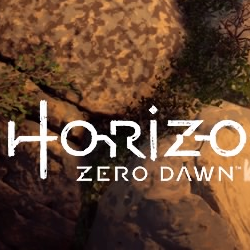

In [76]:
img = cv2.imread("HorizonZero.png")
cv2_imshow(img)

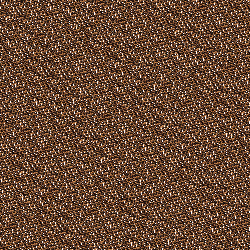

In [77]:
ArnoldCatEncryptionIm = ArnoldCatEncryption(image + ext, key)
cv2_imshow(ArnoldCatEncryptionIm)

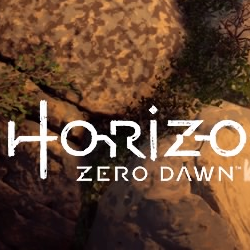

In [78]:
ArnoldCatDecryptionIm = ArnoldCatDecryption(image + "_ArnoldcatEnc.png", key)
cv2_imshow(ArnoldCatDecryptionIm)

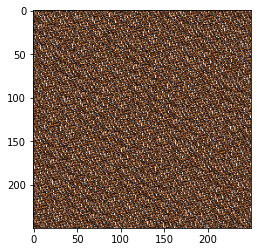

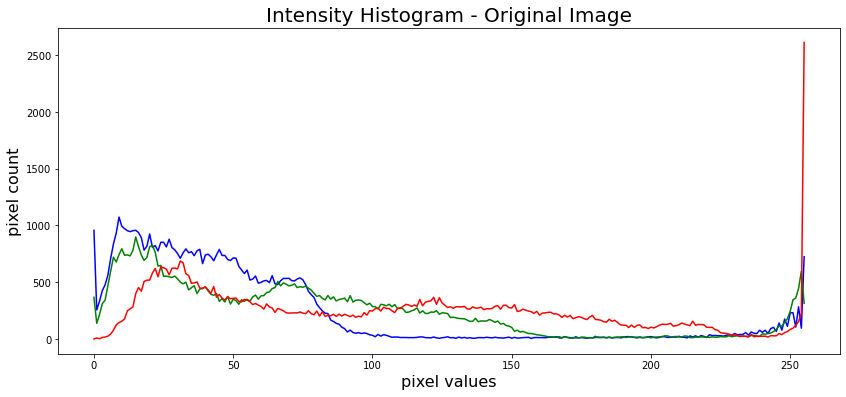

In [80]:
image = "HorizonZero_ArnoldcatEnc"
ext = ".png"
img = cv2.imread(image + ext,1) 
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

plt.figure(figsize=(14,6))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Original Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

In [ ]:
image = "HorizonZero"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

250


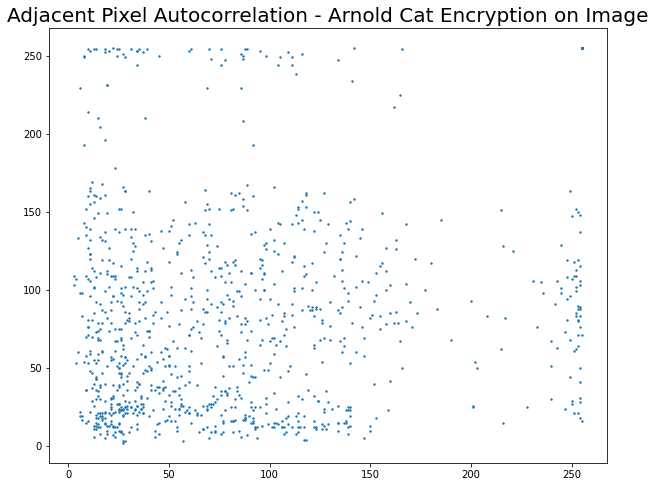

In [82]:
image = "HorizonZero_ArnoldcatEnc"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
print(image_size)
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Arnold Cat Encryption on Image', fontsize=20)
plt.show()

**Henon Map**


Given initial conditions (x0,y0), a henon map is given by the following equations:

(Xn+1) = (Yn) + 1 − a.(Xn)

(Yn+1) = b * (Xn)

Classical Henon map have values of a = 1.4 and b = 0.3. For the classical values the Henon map is chaotic. For other values of a and b the map may be chaotic, intermittent, or converge to a periodic orbit.

In [83]:
def dec(bitSequence):
    decimal = 0
    for bit in bitSequence:
        decimal = decimal * 2 + int(bit)
    return decimal

In [84]:
def genHenonMap(dimension, key):
    x = key[0]
    y = key[1]
    sequenceSize = dimension * dimension * 8 #Total Number of bitSequence produced
    bitSequence = []    #Each bitSequence contains 8 bits
    byteArray = []      #Each byteArray contains m( i.e 512 in this case) bitSequence
    TImageMatrix = []   #Each TImageMatrix contains m*n byteArray( i.e 512 byteArray in this case)
    for i in range(sequenceSize):
        xN = y + 1 - 1.4 * x**2
        yN = 0.3 * x

        x = xN
        y = yN

        if xN <= 0.4:
            bit = 0
        else:
            bit = 1

        try:
            bitSequence.append(bit)
        except:
            bitSequence = [bit]

        if i % 8 == 7:
            decimal = dec(bitSequence)
            try:
                byteArray.append(decimal)
            except:
                byteArray = [decimal]
            bitSequence = []

        byteArraySize = dimension*8
        if i % byteArraySize == byteArraySize-1:
            try:
                TImageMatrix.append(byteArray)
            except:
                TImageMatrix = [byteArray]
            byteArray = []
    return TImageMatrix

# `Henon Encryption`

In [85]:
def HenonEncryption(imageName,key):
    imageMatrix, dimension, color = getImageMatrix(imageName)
    transformationMatrix = genHenonMap(dimension, key)
    resultantMatrix = []
    for i in range(dimension):
        row = []
        for j in range(dimension):
            try:
                if color:
                    row.append(tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]))
                else:
                    row.append(transformationMatrix[i][j] ^ imageMatrix[i][j])
            except:
                if color:
                    row = [tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]])]
                else :
                    row = [transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]
        try:    
            resultantMatrix.append(row)
        except:
            resultantMatrix = [row]
    if color:
      im = Image.new("RGB", (dimension, dimension))
    else: 
      im = Image.new("L", (dimension, dimension)) # L is for Black and white pixels

    pix = im.load()
    for x in range(dimension):
        for y in range(dimension):
            pix[x, y] = resultantMatrix[x][y]
    im.save(imageName.split('.')[0] + "_HenonEnc.png", "PNG")

# `Henon Decryption`

In [86]:
def HenonDecryption(imageNameEnc, key):
    imageMatrix, dimension, color = getImageMatrix(imageNameEnc)
    transformationMatrix = genHenonMap(dimension, key)
    pil_im = Image.open(imageNameEnc, 'r')
    imshow(np.asarray(pil_im))
    henonDecryptedImage = []
    for i in range(dimension):
        row = []
        for j in range(dimension):
            try:
                if color:
                    row.append(tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]))
                else:
                    row.append(transformationMatrix[i][j] ^ imageMatrix[i][j])
            except:
                if color:
                    row = [tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]])]
                else :
                    row = [transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]
        try:
            henonDecryptedImage.append(row)
        except:
            henonDecryptedImage = [row]
    if color:
        im = Image.new("RGB", (dimension, dimension))
    else: 
        im = Image.new("L", (dimension, dimension)) # L is for Black and white pixels

    pix = im.load()
    for x in range(dimension):
        for y in range(dimension):
            pix[x, y] = henonDecryptedImage[x][y]
    im.save(imageNameEnc.split('_')[0] + "_HenonDec.png", "PNG")

# Comparison of Encryption

In [87]:
image = "HorizonZero"
ext = ".png"
key = (0.1,0.1)

# Origional Image

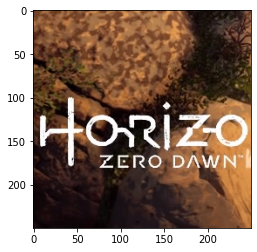

In [88]:
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

# Encryption Using Henon Map

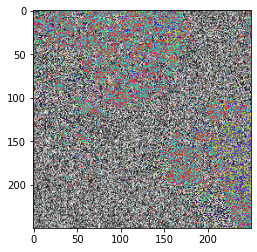

In [89]:
HenonEncryption(image + ext, key)
im = Image.open(image + "_HenonEnc.png", 'r')
imshow(np.asarray(im))

# Henon Decryption Algorotithm

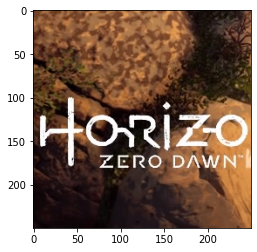

In [90]:
HenonDecryption(image + "_HenonEnc.png", key)
im = Image.open(image + "_HenonDec.png", 'r')
imshow(np.asarray(im))

# Histogram Analysis

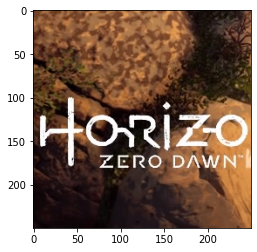

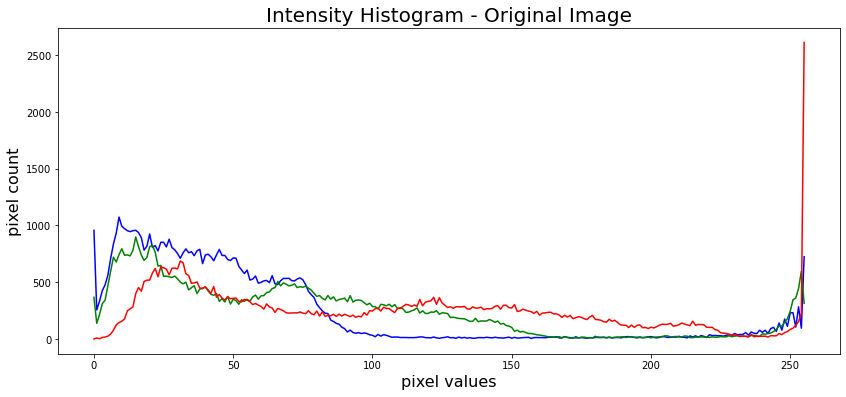

In [91]:
image = "HorizonZero"
ext = ".png"
img = cv2.imread(image + ext,1) 
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))
plt.figure(figsize=(14,6))

histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red') 
plt.title('Intensity Histogram - Original Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

# Encrypted Image Analysis

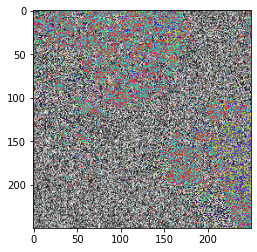

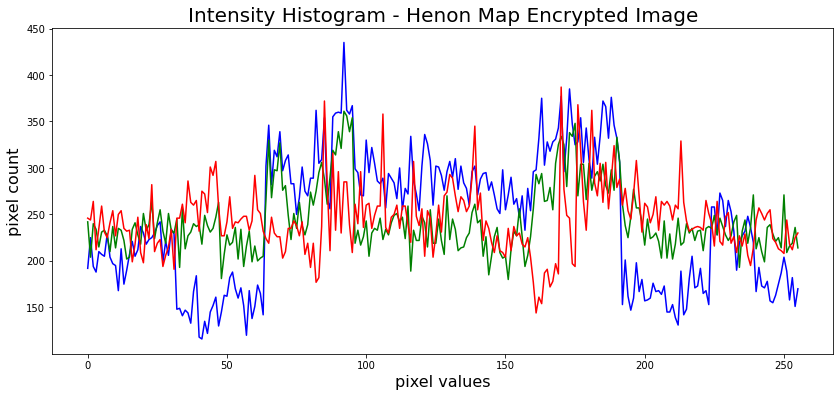

In [92]:
image = "HorizonZero_HenonEnc"
ext = ".png"
img = cv2.imread(image + ext,1) 
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))
plt.figure(figsize=(14,6))

histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue') 
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256]) 
plt.plot(histogram_green, color='green') 
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256]) 
plt.plot(histogram_red, color='red') 
plt.title('Intensity Histogram - Henon Map Encrypted Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16) 
plt.show()

# Auto Pixel Correlation!!!

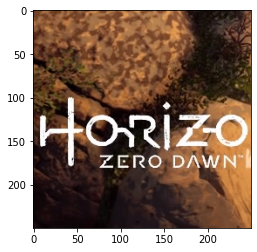

In [93]:
image = "HorizonZero"
ext = ".png"
img = Image.open(image+ext).convert('LA')
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

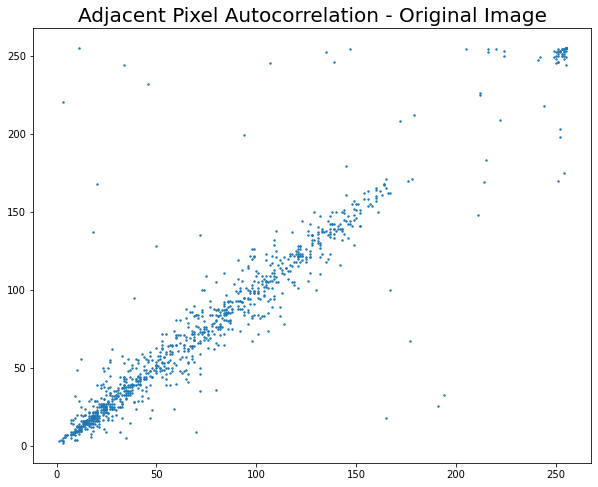

In [94]:
image = "HorizonZero"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

# Encrypted Image Pixels Corelation!!!!

250


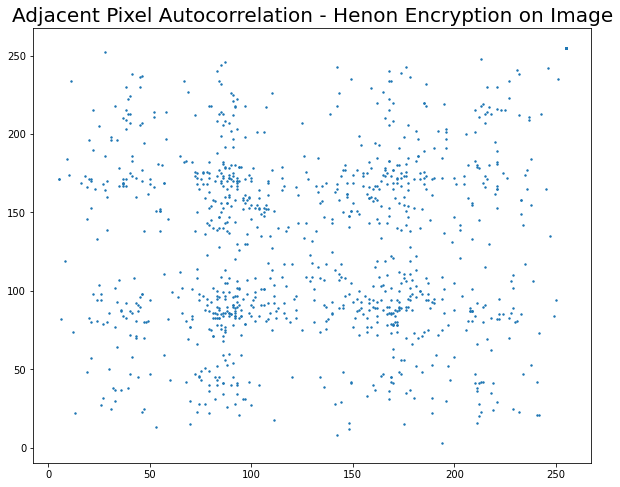

In [95]:
image = "HorizonZero_HenonEnc"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
print(image_size)
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Henon Encryption on Image', fontsize=20)
plt.show()